<a href="https://colab.research.google.com/github/adikulkarni11/Machine-Learning-Models/blob/main/Celebrity_Face_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using photos from Large-scale CelebFaces Attributes (CelebA) Dataset to train convets that can classify photos to male celebrities and female celebrities accurately.
## To make this problem more challenging, we only use 2,000 photos for training, 1,000 photos for validation, and 1,000 photos for testing.
## Initially, we train our model using only the 2,000 training photos. Note we need to use data augmentation and dropout to fight overfiting. 
## Later, we use a pretrained convet (VGG16) to help with our task. 
## All the photos are of the size (218, 178), where height = 218, and width = 178.

Aditya Kulkarni

# Part 1

In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [ ]:
import os, shutil

In [ ]:
!unzip /content/celeb_photos.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
base_dir = '/content/celebs'
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training male pictures
train_male_dir = os.path.join(train_dir, 'male')

# Directory with our training female pictures
train_female_dir = os.path.join(train_dir, 'female')

# Directory with our validation male pictures
validation_male_dir = os.path.join(validation_dir, 'male')

# Directory with our validation female pictures
validation_female_dir = os.path.join(validation_dir, 'female')

# Directory with our validation male pictures
test_male_dir = os.path.join(test_dir, 'male')

# Directory with our validation female pictures
test_female_dir = os.path.join(test_dir, 'female')

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [ ]:
print('total training male images:', len(os.listdir(train_male_dir)))

total training male images: 825


In [ ]:
print('total training female images:', len(os.listdir(train_female_dir)))

total training female images: 1175


In [ ]:
print('total validation male images:', len(os.listdir(validation_male_dir)))

total validation male images: 413


In [ ]:
print('total validation female images:', len(os.listdir(validation_female_dir)))

total validation female images: 587


In [ ]:
print('total test male images:', len(os.listdir(test_male_dir)))

total test male images: 412


In [ ]:
print('total test female images:', len(os.listdir(test_female_dir)))

total test female images: 588


Instantiating a small convnet for the male vs. female classification.

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(218, 178, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now that the convnet is made, I will check the dimensions of the feature maps and the layers.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 216, 176, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 88, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 86, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 43, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 51, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 20, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 18, 128)      

Configuring the model for training.

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

To use the images that were collected earlier, we need to preprocess them so that it is formatted the right way.

Using ImageDataGenerator to read images from the given directories.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(218, 178),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(218, 178),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 218, 178, 3)
labels batch shape: (20,)


The output of one of the generators yields batches of 218x178 images shaped (20, 218, 178, 3) and binary labels (shape, (20,)).

Fitting the model to the data using a batch generator.

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6067 - acc: 0.6825 - val_loss: 0.4944 - val_acc: 0.6370
Epoch 2/30
100/100 [==============================] - 3s 26ms/step - loss: 0.4866 - acc: 0.7695 - val_loss: 0.2620 - val_acc: 0.8220
Epoch 3/30
100/100 [==============================] - 3s 26ms/step - loss: 0.3869 - acc: 0.8285 - val_loss: 0.2545 - val_acc: 0.8290
Epoch 4/30
100/100 [==============================] - 3s 26ms/step - loss: 0.2945 - acc: 0.8745 - val_loss: 0.8221 - val_acc: 0.7160
Epoch 5/30
100/100 [==============================] - 3s 26ms/step - loss: 0.2304 - acc: 0.9050 - val_loss: 0.2089 - val_acc: 0.8750
Epoch 6/30
100/100 [==============================] - 3s 26ms/step - loss: 0.1890 - acc: 0.9265 - val_loss: 0.2942 - val_acc: 0.9160
Epoch 7/30
100/100 [==============================] - 3s 26ms/step - loss: 0.1526 - acc: 0.9360 - val_loss: 0.0432 - val_acc: 0.9320
Epoch 8/30
100/100 [==============================] - 3s 27ms/step - 

Saving the model (good practice).

In [ ]:
model.save('male_and_female_small_1.h5')

Displaying the curves of loss and accuracy during training.

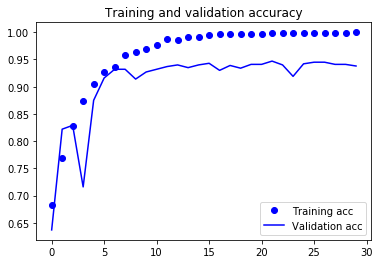

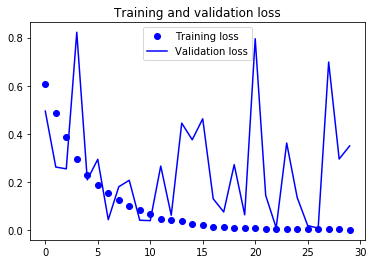

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Clearly, it is observed the the plot are drastically overfitting. 
The training accuracy reaches nearly 100% over time where as the validation accuracy stalls at around 94%.

The validation loss reaches a minimum after 17 epochs and fluctuates rapidly whereas the training loss is linearly decreasing over time.

### The training accuracy is logarithmic. Let us now use data augmentation and dropout to fight overfitting!

Setting up a data augmentation configuration using the ImageDataGenerator.

We use rotation_range, width_shift_range,  height_shift_range, shear_range, zoom_range, horizontal_flip and fill_mode to augment the data.

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Displaying some randomly augmented training images from the female training set.

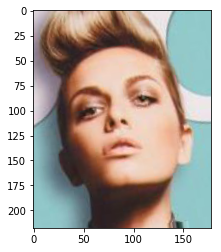

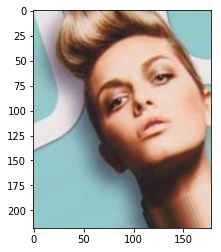

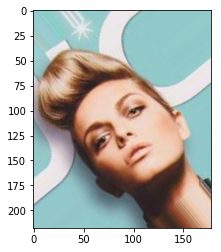

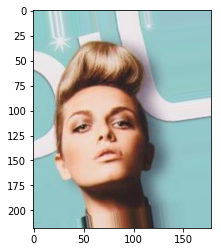

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_female_dir, fname) for fname in os.listdir(train_female_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(218, 178))

# Convert it to a Numpy array with shape (218, 178, 3)
x = image.img_to_array(img)

# Reshape it to (1, 218, 178, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Data augmentation alone will not be able to fight overfitting enough. 
Using a dropout layer to further stop overfitting.

Defining a new convnet that includes dropout.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(218, 178, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Training the convnet using data-augmentation generators.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 218x178
        target_size=(218, 178),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(218, 178),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 22s 217ms/step - loss: 0.6761 - acc: 0.5989 - val_loss: 0.5516 - val_acc: 0.7024
Epoch 2/100
100/100 [==============================] - 21s 207ms/step - loss: 0.6201 - acc: 0.6651 - val_loss: 0.5889 - val_acc: 0.6720
Epoch 3/100
100/100 [==============================] - 20s 204ms/step - loss: 0.5948 - acc: 0.6926 - val_loss: 0.4160 - val_acc: 0.7576
Epoch 4/100
100/100 [==============================] - 21s 208ms/step - loss: 0.5850 - acc: 0.6900 - val_loss: 0.4973 - val_acc: 0.7332
Epoch 5/100
100/100 [==============================] - 20s 204ms/step - loss: 0.5753 - acc: 0.7014 - val_loss: 0.4412 - val_acc: 0.7690
Epoch 6/100
100/100 [==============================] - 21s 211ms/step - loss: 0.5572 - acc: 0.7186 - val_loss: 0.3896 - val_acc: 0.7835
Epoch 7/100
100/100 [==============================] - 20s 203ms/step - loss: 0.5586 - acc: 0.7116 -

100/100 [==============================] - 20s 202ms/step - loss: 0.2390 - acc: 0.9105 - val_loss: 0.1616 - val_acc: 0.9029
Epoch 61/100
100/100 [==============================] - 21s 208ms/step - loss: 0.2362 - acc: 0.8976 - val_loss: 0.2066 - val_acc: 0.9137
Epoch 62/100
100/100 [==============================] - 20s 205ms/step - loss: 0.2466 - acc: 0.8998 - val_loss: 0.3803 - val_acc: 0.8972
Epoch 63/100
100/100 [==============================] - 21s 206ms/step - loss: 0.2266 - acc: 0.9037 - val_loss: 0.1395 - val_acc: 0.8969
Epoch 64/100
100/100 [==============================] - 20s 204ms/step - loss: 0.2355 - acc: 0.9004 - val_loss: 0.3276 - val_acc: 0.9227
Epoch 65/100
100/100 [==============================] - 21s 205ms/step - loss: 0.2239 - acc: 0.8996 - val_loss: 0.1168 - val_acc: 0.9099
Epoch 66/100
100/100 [==============================] - 21s 208ms/step - loss: 0.2301 - acc: 0.9001 - val_loss: 0.0696 - val_acc: 0.9188
Epoch 67/100
100/100 [==============================] 

Saving the model.

In [ ]:
model.save('male_and_female_small_2.h5')

Plotting the graphs using same method as above.

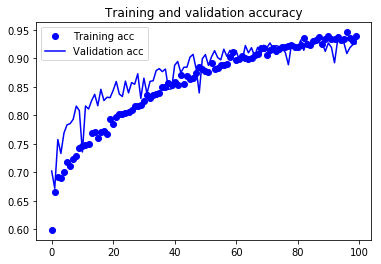

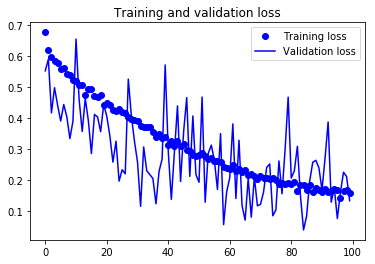

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

From the above graphs, I can see that there is no more great overfitting. Instead, the training curves are closely tracking the validation curves.

I reach an accuracy of 93%, wich is higher than the non-regularized model.

# Part 2
## Fast Feature Extration Without Data Augmentation


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(218, 178, 3))

In [ ]:
conv_base.summary() 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 218, 178, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 218, 178, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 218, 178, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 109, 89, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 109, 89, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 109, 89, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 54, 44, 128)       0     

The final feature map has shape (6, 5, 512). We will stick a densely connected classifier on this feature.

Extracting Features using the pretrained convolutional base.

In [ ]:
import numpy as np

batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 6, 5, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(218, 178),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are of shape (samples, 6, 5, 512). 
I will now flatten it to (samples, 15360).

In [ ]:
train_features = np.reshape(train_features, (2000, 6 * 5 * 512))
validation_features = np.reshape(validation_features, (1000, 6 * 5 * 512))
test_features = np.reshape(test_features, (1000, 6 * 5 * 512))

Defining and training the densely connected classifier.

In [ ]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=6 * 5 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Nadam(learning_rate=0.00002),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/100
2000/2000 [==============================] - 1s 401us/step - loss: 4.5344 - acc: 0.6145 - val_loss: 1.2738 - val_acc: 0.7850
Epoch 2/100
2000/2000 [==============================] - 1s 332us/step - loss: 1.9454 - acc: 0.7780 - val_loss: 1.0351 - val_acc: 0.8350
Epoch 3/100
2000/2000 [==============================] - 1s 333us/step - loss: 1.2495 - acc: 0.8315 - val_loss: 0.9741 - val_acc: 0.8510
Epoch 4/100
2000/2000 [==============================] - 1s 332us/step - loss: 0.7989 - acc: 0.8725 - val_loss: 0.8599 - val_acc: 0.8610
Epoch 5/100
2000/2000 [==============================] - 1s 332us/step - loss: 0.6129 - acc: 0.8990 - val_loss: 0.8229 - val_acc: 0.8640
Epoch 6/100
2000/2000 [==============================] - 1s 333us/step - loss: 0.4425 - acc: 0.9200 - val_loss: 0.7917 - val_acc: 0.8660
Epoch 7/100
2000/2000 [==============================] - 1s 332us/step - loss: 0.2958 - acc: 0.9260 - val_loss: 0.7778 - val_acc: 

2000/2000 [==============================] - 1s 329us/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.7182 - val_acc: 0.8860
Epoch 61/100
2000/2000 [==============================] - 1s 330us/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.7356 - val_acc: 0.8850
Epoch 62/100
2000/2000 [==============================] - 1s 328us/step - loss: 0.0080 - acc: 0.9985 - val_loss: 0.7045 - val_acc: 0.8910
Epoch 63/100
2000/2000 [==============================] - 1s 329us/step - loss: 0.0044 - acc: 0.9975 - val_loss: 0.7210 - val_acc: 0.8910
Epoch 64/100
2000/2000 [==============================] - 1s 328us/step - loss: 0.0036 - acc: 0.9980 - val_loss: 0.7140 - val_acc: 0.8970
Epoch 65/100
2000/2000 [==============================] - 1s 329us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.7079 - val_acc: 0.8900
Epoch 66/100
2000/2000 [==============================] - 1s 330us/step - loss: 0.0013 - acc: 0.9995 - val_loss: 0.7126 - val_acc: 0.8870
Epoch 67/100
2000/2000 [=======================

Plotting the Results.

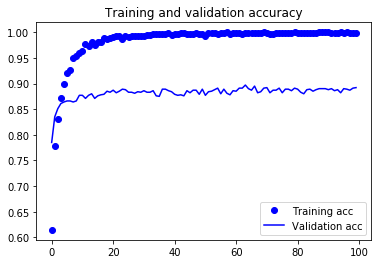

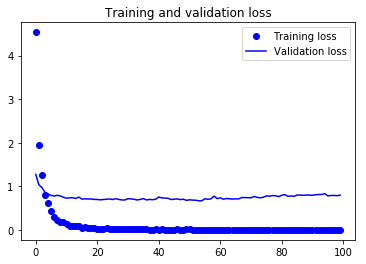

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We observe to get an accuracy of about 87%. However from the graph I see that I am overfitting it although using a dropout with a large rate.

However, this is fine as we are not using data augmentation, which prevents overfitting with a small dataset such as this.

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 5, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 15360)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               3932416   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 18,647,361
Trainable params: 18,647,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 218,178
        target_size=(218,178),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(218,178),
        batch_size=20,
        class_mode='binary')



      

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Nadam(learning_rate=0.00002),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)


Epoch 1/30
 - 23s - loss: 0.5985 - acc: 0.6709 - val_loss: 0.3208 - val_acc: 0.8610
Epoch 2/30
 - 20s - loss: 0.4497 - acc: 0.7920 - val_loss: 0.3884 - val_acc: 0.8570
Epoch 3/30
 - 20s - loss: 0.3900 - acc: 0.8330 - val_loss: 0.2075 - val_acc: 0.8900
Epoch 4/30
 - 21s - loss: 0.3696 - acc: 0.8361 - val_loss: 0.2478 - val_acc: 0.8970
Epoch 5/30
 - 21s - loss: 0.3494 - acc: 0.8475 - val_loss: 0.1488 - val_acc: 0.8970
Epoch 6/30
 - 22s - loss: 0.3292 - acc: 0.8606 - val_loss: 0.2760 - val_acc: 0.9040
Epoch 7/30
 - 20s - loss: 0.3264 - acc: 0.8621 - val_loss: 0.3827 - val_acc: 0.8910
Epoch 8/30
 - 21s - loss: 0.3090 - acc: 0.8653 - val_loss: 0.2095 - val_acc: 0.9040
Epoch 9/30
 - 21s - loss: 0.3130 - acc: 0.8662 - val_loss: 0.2315 - val_acc: 0.9090
Epoch 10/30
 - 20s - loss: 0.2995 - acc: 0.8759 - val_loss: 0.1325 - val_acc: 0.9040
Epoch 11/30
 - 22s - loss: 0.2856 - acc: 0.8769 - val_loss: 0.1829 - val_acc: 0.9090
Epoch 12/30
 - 20s - loss: 0.2853 - acc: 0.8778 - val_loss: 0.1578 - val_a

In [ ]:
model.save('male_and_female_small_3.h5')

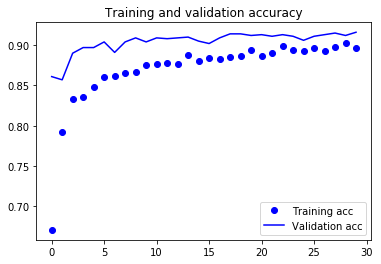

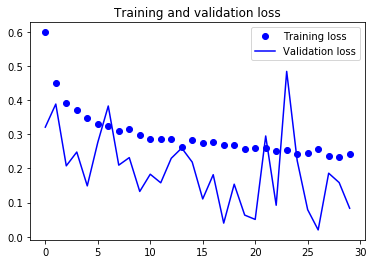

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Finetuning

Let us look at our convolutional base.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 218, 178, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 218, 178, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 218, 178, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 109, 89, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 109, 89, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 109, 89, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 54, 44, 128)       0     

Let fine tune the last 3 convolutional layers by freezing the rest so that we do not have too many parameters to train and I use layers that have specialized features.


Freezing layers up to block5_conv1.

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Fine-Tuning the model.

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Nadam(learning_rate=0.00002),
              metrics=['acc'])



In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 23s 229ms/step - loss: 0.2417 - acc: 0.9018 - val_loss: 0.0647 - val_acc: 0.9210
Epoch 2/100
100/100 [==============================] - 21s 207ms/step - loss: 0.1972 - acc: 0.9199 - val_loss: 0.0906 - val_acc: 0.9380
Epoch 3/100
100/100 [==============================] - 21s 207ms/step - loss: 0.1676 - acc: 0.9315 - val_loss: 0.1691 - val_acc: 0.9420
Epoch 4/100
100/100 [==============================] - 21s 208ms/step - loss: 0.1398 - acc: 0.9441 - val_loss: 0.2120 - val_acc: 0.9440
Epoch 5/100
100/100 [==============================] - 21s 205ms/step - loss: 0.1353 - acc: 0.9448 - val_loss: 0.2875 - val_acc: 0.9460
Epoch 6/100
100/100 [==============================] - 22s 224ms/step - loss: 0.1177 - acc: 0.9535 - val_loss: 0.0822 - val_acc: 0.9430
Epoch 7/100
100/100 [==============================] - 21s 207ms/step - loss: 0.1028 - acc: 0.9637 - val_loss: 0.1785 - val_acc: 0.9430
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 21s 208ms/step - loss: 0.0111 - acc: 0.9956 - val_loss: 1.5382e-04 - val_acc: 0.9430
Epoch 62/100
100/100 [==============================] - 21s 215ms/step - loss: 0.0179 - acc: 0.9946 - val_loss: 1.0734 - val_acc: 0.9560
Epoch 63/100
100/100 [==============================] - 21s 208ms/step - loss: 0.0054 - acc: 0.9991 - val_loss: 0.0148 - val_acc: 0.9480
Epoch 64/100
100/100 [==============================] - 21s 207ms/step - loss: 0.0122 - acc: 0.9953 - val_loss: 0.4159 - val_acc: 0.9340
Epoch 65/100
100/100 [==============================] - 21s 206ms/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.0959 - val_acc: 0.9540
Epoch 66/100
100/100 [==============================] - 21s 207ms/step - loss: 0.0154 - acc: 0.9947 - val_loss: 0.5213 - val_acc: 0.9490
Epoch 67/100
100/100 [==============================] - 21s 210ms/step - loss: 0.0058 - acc: 0.9975 - val_loss: 0.0139 - val_acc: 0.9630
Epoch 68/100
100/100 [===============

In [ ]:
model.save('male_and_female_small_4.h5')

Plotting the results.

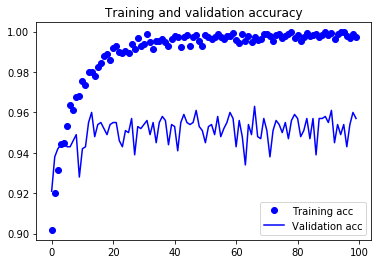

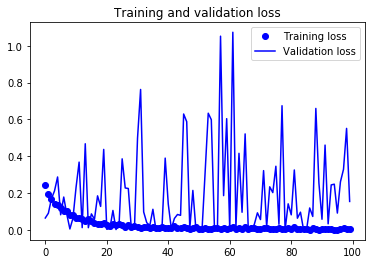

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The curves are too noisy. 

Making them readable by smoothening.

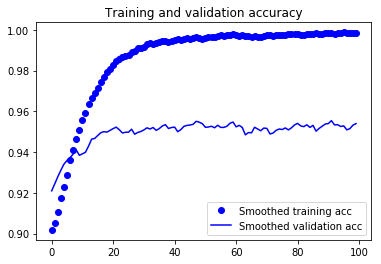

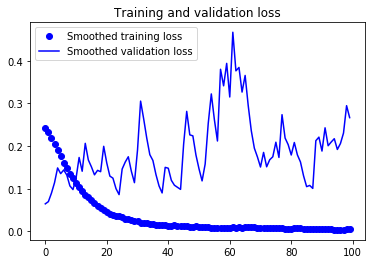

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The validation accuracy is now much cleaner. 

We observe a good absolute improvement in accuracy.
The loss curve does not show any real improvement. However, the model may still be improving even though it is not reflected in the average loss.

Evaluating the model on the test data.

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(218,178),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9459999799728394


Here, I observe to get a 94.6% accuracy with the limited amount of training data samples!

Aditya Kulkarni 04/13/20
Thank You!
#End 